## Classifying Meme Images into Hateful or Not-Hateful 
### Model 1: Training VGG16

### Step 1: Importing the required libraries

In [1]:
import os 
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers 
from tensorflow.keras import Model 

### Step 2: Setting up different paths

In [2]:
source_folder = "img"
train_folder = "train_data"
validation_folder = "validation_data"

train_dir = os.path.join(source_folder, train_folder)
validation_dir = os.path.join(source_folder, validation_folder)

# Various Directory Paths
train_hateful_memes_dir = os.path.join(train_dir, 'hateful_memes')
train_not_hateful_memes_dir = os.path.join(train_dir, 'not_hateful_memes')
validation_hateful_memes_dir = os.path.join(validation_dir, 'hateful_memes')
validation_not_hateful_memes_dir = os.path.join(validation_dir, 'not_hateful_memes')

### Step 3: Checking count of images present in the dataset

In [3]:
#Checking Count of Images in Dataset

print('total training hateful images:', len(os.listdir(train_hateful_memes_dir)))
print('total training not hateful images:', len(os.listdir(train_not_hateful_memes_dir)))
print('total validation hateful images:', len(os.listdir(validation_hateful_memes_dir)))
print('total validation not hateful images:', len(os.listdir(validation_not_hateful_memes_dir)))

total training hateful images: 2400
total training not hateful images: 2400
total validation hateful images: 600
total validation not hateful images: 600


### Step 4: Performing Data-Augmentation using ImageDataGenerator

In [4]:
# Data-augmentation parameters to ImageDataGenerator for Training set

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
validation_datagen = ImageDataGenerator( rescale = 1.0/255)

### Step 5: Setting up Training and Validation Generators

In [5]:
# Flow training images in batches of 10 using train_datagen generator

train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        classes = ['hateful_memes', 'not_hateful_memes'], #The Classification
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=10,
        class_mode='binary') # Use binary labels

# Flow validation images in batches of 10 using valid_datagen generator

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,  # This is the source directory for validating images
        classes = ['hateful_memes', 'not_hateful_memes'], #The Classification
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=10,
        class_mode='binary', # Use binary labels
        shuffle=False)

Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


### Step 6: Setting up the VGG16 Model for Training

In [6]:
#Importing the Model VGG16

from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Step 7: Choosing the Training Parameters

In [9]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

### Step 8: Start the Training of the model

In [10]:
vgghist = model.fit(
      train_generator,
      steps_per_epoch=480,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=120)

Epoch 1/10



480/480 [==============================] - 370s 769ms/step - loss: 1.1259 - acc: 0.5002 - val_loss: 0.6930 - val_acc: 0.4975
Epoch 2/10
480/480 [==============================] - 364s 759ms/step - loss: 0.6960 - acc: 0.5029 - val_loss: 0.6929 - val_acc: 0.5283
Epoch 3/10
480/480 [==============================] - 360s 750ms/step - loss: 0.6951 - acc: 0.5088 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 4/10
480/480 [==============================] - 360s 750ms/step - loss: 0.6965 - acc: 0.5190 - val_loss: 0.6929 - val_acc: 0.5058
Epoch 5/10
480/480 [==============================] - 356s 741ms/step - loss: 0.6959 - acc: 0.5088 - val_loss: 0.6883 - val_acc: 0.5608
Epoch 6/10
480/480 [==============================] - 357s 744ms/step - loss: 0.6943 - acc: 0.5010 - val_loss: 0.6930 - val_acc: 0.5075
Epoch 7/10
480/480 [==============================] - 358s 746ms/step - loss: 0.6947 - acc: 0.4990 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/10
480/480 [==============================] - 357s 

### Step 9: Start Validation of the model


In [11]:
val_loss, val_acc = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

120/120 [==============================] - 61s 506ms/step - loss: 0.6895 - acc: 0.5575
Validation Loss: 0.6894544363021851
Validation Accuracy: 0.5575000047683716


### Step 10: Saving the Model

In [13]:
model.save('Classification_VGG16.keras')

### Step 11: Testing the Model for Classification

In [ ]:
local_image_directory = "" #Insert the Folder Path containing the images
from keras.preprocessing import image
import matplotlib.pyplot as plt

# List all files in the directory
image_files = [f for f in os.listdir(local_image_directory) if os.path.isfile(os.path.join(local_image_directory, f))]

for fn in image_files:
    # Predicting images
    path = os.path.join(local_image_directory, fn)  # Updated to use os.path.join for the file path
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=1)
    if classes[0] < 0.5:
        print(fn + " is a Hateful Meme")
    else:
        print(fn + " is a Not Hateful Meme")

### Step 12: Visualizing the Loss and Accuracy of the Model

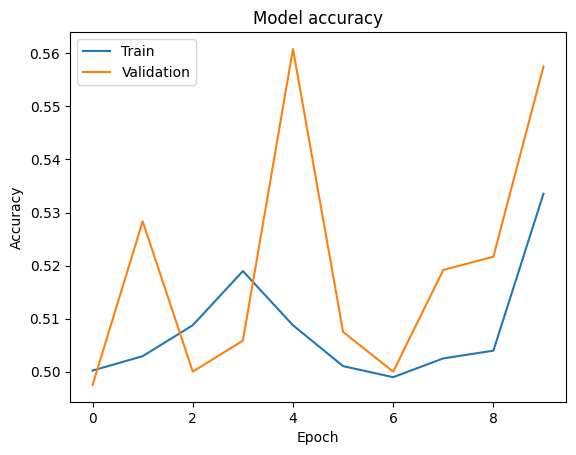

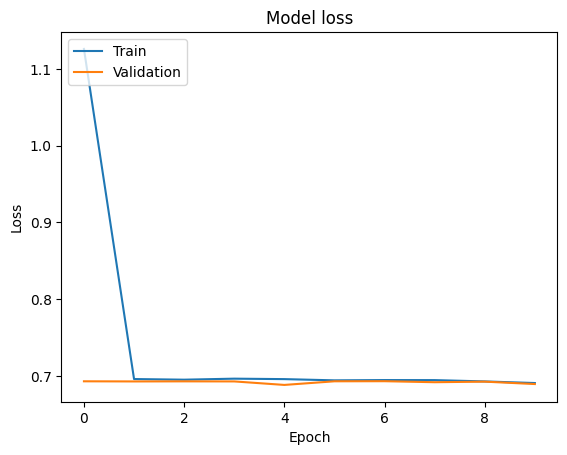

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(vgghist.history['acc'])
plt.plot(vgghist.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(vgghist.history['loss'])
plt.plot(vgghist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()